### Data Integration and Operations

**Importing Dependencies**

In [156]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

#### Data Integration

In [157]:
stock_apple_df = pd.read_csv(r'D:\Capstone Projects\StockerLens\data\raw\stock data\apple_stock_data.csv')

print(stock_apple_df.head())

stock_apple_df.drop(index=[0,1], inplace=True)
stock_apple_df.reset_index(drop=True, inplace=True)
stock_apple_df.rename(columns={'Price':'date'}, inplace=True)

stock_apple_df.head()

        Price              Close                High                 Low  \
0      Ticker               AAPL                AAPL                AAPL   
1        Date                NaN                 NaN                 NaN   
2  2019-01-02  37.66719055175781   37.88901670735737   36.78704853865948   
3  2019-01-03  33.91524887084961  34.757226401323194  33.869929368945684   
4  2019-01-04  35.36307144165039   35.43224447060452   34.29927134520694   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2   36.94447308269307  148158800  
3  34.342199196005986  365248800  
4     34.473390406461  234428400  


,date,Close,High,Low,Open,Volume
0,2019-01-02,37.66719055175781,37.88901670735737,36.78704853865948,36.94447308269307,148158800
1,2019-01-03,33.91524887084961,34.757226401323194,33.869929368945684,34.342199196005986,365248800
2,2019-01-04,35.36307144165039,35.43224447060452,34.29927134520694,34.473390406461,234428400
3,2019-01-07,35.28436279296875,35.499033590805276,34.800166098962414,35.46802473744808,219111200
4,2019-01-08,35.95699691772461,36.212215823587805,35.42509675519286,35.673156691404685,164101200


In [158]:
stock_amazon_df = pd.read_csv(r'D:\Capstone Projects\StockerLens\data\raw\stock data\amazon_stock_data.csv')

stock_amazon_df.drop(index=[0,1], inplace=True)
stock_amazon_df.reset_index(drop=True, inplace=True)
stock_amazon_df.rename(columns={'Price':'date'}, inplace=True)

stock_amazon_df.head()

,date,Close,High,Low,Open,Volume
0,2019-01-02,76.95649719238281,77.66799926757812,73.04650115966797,73.26000213623047,159662000
1,2019-01-03,75.01399993896484,76.9000015258789,74.85549926757812,76.00050354003906,139512000
2,2019-01-04,78.76950073242188,79.69999694824219,75.91549682617188,76.5,183652000
3,2019-01-07,81.47550201416016,81.72799682617188,79.45950317382812,80.1155014038086,159864000
4,2019-01-08,82.8290023803711,83.83049774169922,80.83049774169922,83.2344970703125,177628000


In [159]:
stock_microsoft_df = pd.read_csv(r'D:\Capstone Projects\StockerLens\data\raw\stock data\microsoft_stock_data.csv')

stock_microsoft_df.drop(index=[0,1], inplace=True)
stock_microsoft_df.reset_index(drop=True, inplace=True)
stock_microsoft_df.rename(columns={'Price':'date'}, inplace=True)

stock_microsoft_df.head()

,date,Close,High,Low,Open,Volume
0,2019-01-02,95.11981964111328,95.7124345886197,93.06917456384244,93.64297941413524,35329300
1,2019-01-03,91.62055206298828,94.24500196167683,91.43241520948595,94.16033858342901,42579100
2,2019-01-04,95.88175964355469,96.4273457908274,93.05977123906669,93.80289571345104,44060600
3,2019-01-07,96.00404357910156,97.14224471191753,94.98813320401231,95.60896692341754,35656100
4,2019-01-08,96.70012664794922,97.80070026425463,95.67480059197456,96.92588368231493,31514400


In [160]:
with open(r'D:\Capstone Projects\StockerLens\data\raw\stock data\sentimnet_data_2019to2025.json', 'r') as file:
    sentiment_json = json.load(file)

sentiment_json.keys()

dict_keys(['MSFT.US', 'AAPL.US', 'AMZN.US'])

In [161]:
snmt_apple_df = pd.DataFrame(sentiment_json['AAPL.US'])

snmt_amazon_df = pd.DataFrame(sentiment_json['AMZN.US'])

snmt_microsoft_df = pd.DataFrame(sentiment_json['MSFT.US'])

snmt_apple_df.head()

,date,count,normalized
0,2023-01-01,4,0.6400
1,2022-12-31,6,0.3365
2,2022-12-30,22,0.2355
3,2022-12-29,27,0.3943
4,2022-12-28,27,0.2649


In [162]:
apple_df = pd.merge(stock_apple_df, snmt_apple_df, how='left', on='date')
amazon_df = pd.merge(stock_amazon_df, snmt_amazon_df, how='left', on='date')
microsoft_df = pd.merge(stock_microsoft_df, snmt_microsoft_df, how='left', on='date')

apple_df.head()

,date,Close,High,Low,Open,Volume,count,normalized
0,2019-01-02,37.66719055175781,37.88901670735737,36.78704853865948,36.94447308269307,148158800,NaN,NaN
1,2019-01-03,33.91524887084961,34.757226401323194,33.869929368945684,34.342199196005986,365248800,2.0,0.9795
2,2019-01-04,35.36307144165039,35.43224447060452,34.29927134520694,34.473390406461,234428400,NaN,NaN
3,2019-01-07,35.28436279296875,35.499033590805276,34.800166098962414,35.46802473744808,219111200,NaN,NaN
4,2019-01-08,35.95699691772461,36.212215823587805,35.42509675519286,35.673156691404685,164101200,NaN,NaN


In [163]:
apple_df.drop(['count'], axis=1, inplace=True)

In [164]:
amazon_df.drop(['count'], axis=1, inplace=True)
microsoft_df.drop(['count'], axis=1, inplace=True)

In [165]:
apple_df.isnull().sum()

date            0
Close           0
High            0
Low             0
Open            0
Volume          0
normalized    380
dtype: int64

In [166]:
amazon_df.isnull().sum()

date            0
Close           0
High            0
Low             0
Open            0
Volume          0
normalized    385
dtype: int64

In [167]:
microsoft_df.isnull().sum()

date            0
Close           0
High            0
Low             0
Open            0
Volume          0
normalized    441
dtype: int64

In [168]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def imputation(merged_df):
    """
    Input: A pandas DataFrame containing stock-related features ('Close', 'High', 'Low', 'Open', 'Volume') 
           and a 'normalized' column with potential NaN values.

    Output: A pandas DataFrame with missing values in the 'normalized' column imputed using polynomial regression.

    Working: Polynomial regression (degree=2) is applied to capture non-linear relationships between predictors 
             and the target variable ('normalized'). Missing values are predicted and filled based on observed data.
    """
    
    # Separate observed and missing data
    observed_data = merged_df[merged_df['normalized'].notnull()]
    missing_data = merged_df[merged_df['normalized'].isnull()]

    # Features and target for observed data
    X_observed = observed_data[['Close', 'High', 'Low', 'Open', 'Volume']]
    y_observed = observed_data['normalized']

    # Features for missing data
    X_missing = missing_data[['Close', 'High', 'Low', 'Open', 'Volume']]

    # Generate polynomial features (degree=2 for quadratic terms)
    poly = PolynomialFeatures(degree=2)
    X_observed_poly = poly.fit_transform(X_observed)
    X_missing_poly = poly.transform(X_missing)

    # Train regression model
    model = LinearRegression()
    model.fit(X_observed_poly, y_observed)

    # Predict missing values
    predicted_scores = model.predict(X_missing_poly)

    # Assign predicted values back to the dataset
    merged_df.loc[merged_df['normalized'].isnull(), 'normalized'] = predicted_scores

    return merged_df

In [169]:
apple_df = imputation(apple_df)
amazon_df = imputation(amazon_df)
microsoft_df = imputation(microsoft_df)

In [170]:
apple_df.head()

,date,Close,High,Low,Open,Volume,normalized
0,2019-01-02,37.66719055175781,37.88901670735737,36.78704853865948,36.94447308269307,148158800,0.408963
1,2019-01-03,33.91524887084961,34.757226401323194,33.869929368945684,34.342199196005986,365248800,0.979500
2,2019-01-04,35.36307144165039,35.43224447060452,34.29927134520694,34.473390406461,234428400,0.501658
3,2019-01-07,35.28436279296875,35.499033590805276,34.800166098962414,35.46802473744808,219111200,0.487303
4,2019-01-08,35.95699691772461,36.212215823587805,35.42509675519286,35.673156691404685,164101200,0.422461


In [171]:
apple_df.to_csv(r'D:\Capstone Projects\StockerLens\data\interim\stock data\apple.csv', index=False)
amazon_df.to_csv(r'D:\Capstone Projects\StockerLens\data\interim\stock data\amazon.csv', index=False)
microsoft_df.to_csv(r'D:\Capstone Projects\StockerLens\data\interim\stock data\microsoft.csv', index=False)

### Exploratory Data Analysis

Overview of Dataset

In [172]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1549 non-null   object 
 1   Close       1549 non-null   object 
 2   High        1549 non-null   object 
 3   Low         1549 non-null   object 
 4   Open        1549 non-null   object 
 5   Volume      1549 non-null   object 
 6   normalized  1549 non-null   float64
dtypes: float64(1), object(6)
memory usage: 84.8+ KB


In [173]:
apple_df.shape

(1549, 7)

Columns except normalized sentiment are object, convert it into float

In [174]:
apple_df.columns

Index(['date', 'Close', 'High', 'Low', 'Open', 'Volume', 'normalized'], dtype='object')

In [175]:
def change_dtype(df):
    columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    for i in columns:
        df[i] = df[i].astype(np.float32)
    
    return df

In [176]:
apple_df = change_dtype(apple_df)
amazon_df = change_dtype(amazon_df)
microsoft_df = change_dtype(microsoft_df)

In [177]:
apple_df.describe()

,Close,High,Low,Open,Volume,normalized
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.0,1549.000000
mean,137.693146,139.061157,136.155487,137.544693,93130664.0,0.512549
std,55.808815,56.234104,55.301739,55.752960,52145944.0,0.260384
min,33.915249,34.757225,33.869930,34.342197,23234700.0,-0.993000
25%,92.932426,93.730568,91.375084,92.311920,57808700.0,0.423400
50%,144.375854,145.952667,142.916962,144.282425,80440800.0,0.495604
75%,174.277115,176.155655,172.511368,174.302475,111792800.0,0.644600
max,258.735504,259.814331,257.347046,257.906433,426510016.0,1.049507


In [178]:
amazon_df.describe()

,Close,High,Low,Open,Volume,normalized
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.0,1549.000000
mean,139.419769,141.069809,137.693649,139.444946,69133848.0,0.642645
std,38.476650,38.829063,38.135262,38.539494,33908092.0,0.170353
min,75.014000,76.900002,73.046501,73.260002,15007500.0,-0.811000
25%,100.040497,101.169998,98.449997,100.158997,46757100.0,0.568900
50%,143.559998,144.979996,140.869995,142.899994,60897100.0,0.638904
75%,168.311996,169.498993,165.850006,167.811005,83146000.0,0.720800
max,242.059998,242.520004,238.029999,239.020004,311345984.0,1.093955


In [179]:
microsoft_df.describe()

,Close,High,Low,Open,Volume,normalized
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.0,1549.000000
mean,264.966217,267.450470,262.233063,264.903595,27834506.0,0.635980
std,98.847710,99.525307,98.108551,98.892967,12063126.0,0.184204
min,91.620552,94.245003,91.432419,93.642982,7164500.0,-0.703500
25%,195.213181,196.864105,193.303070,195.800537,20113700.0,0.544700
50%,256.012024,259.116455,251.992172,255.166870,24926100.0,0.642000
75%,328.625427,331.610718,325.699188,328.971375,31746500.0,0.729700
max,464.854340,465.639771,461.772308,464.297577,97012704.0,1.133048


#### Insights

we can see that there is a huge difference in the stock prices over the 5 years

In [180]:
print(apple_df.duplicated().sum(), amazon_df.duplicated().sum(), microsoft_df.duplicated().sum())

0 0 0


### Time series Analysis

In [181]:
import matplotlib.pyplot as plt

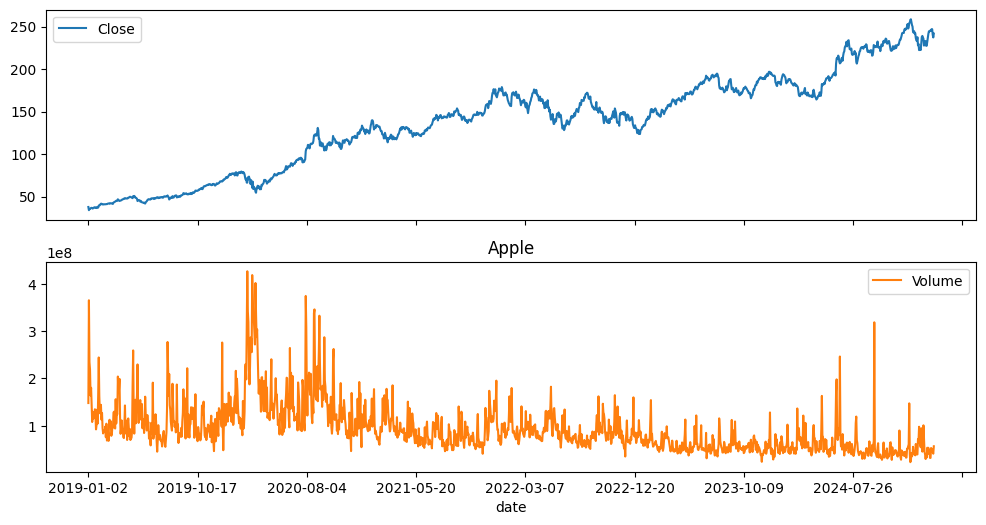

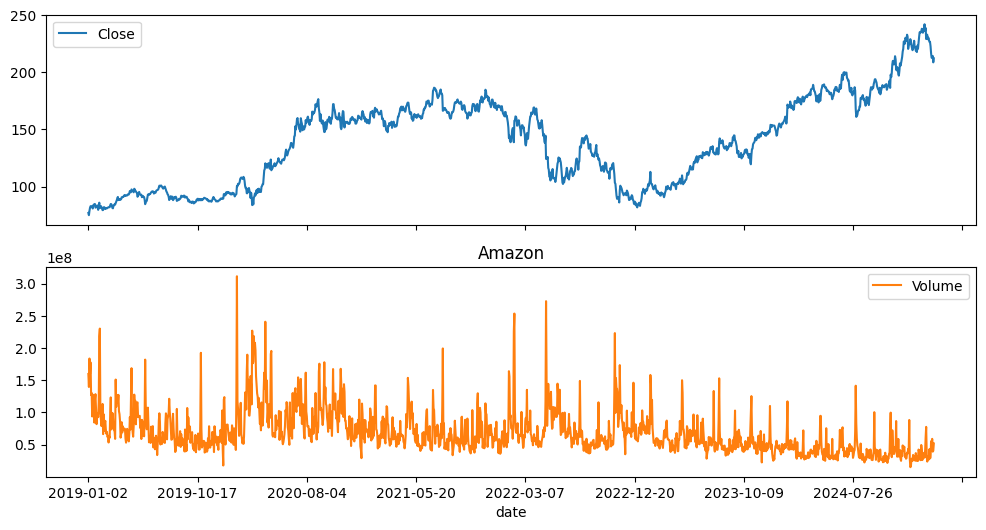

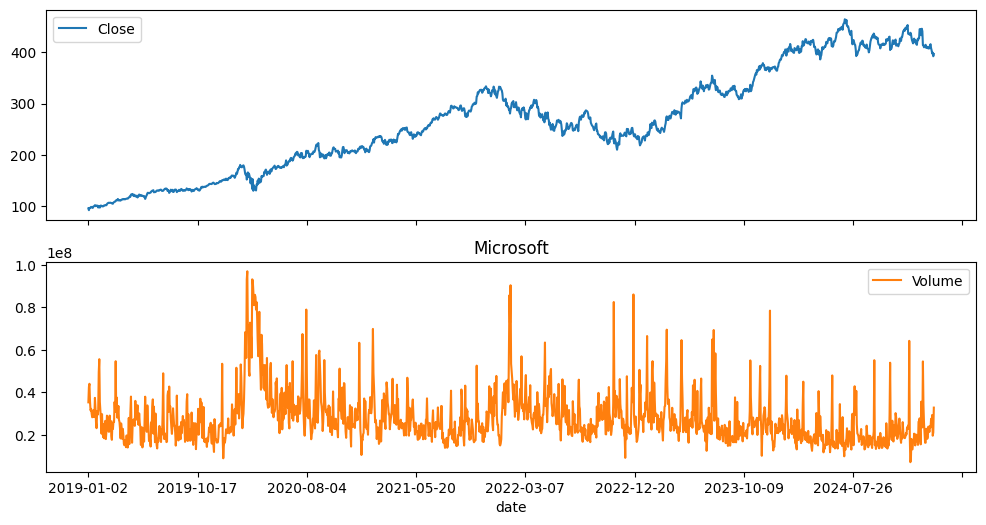

In [182]:
dfs = [apple_df, amazon_df, microsoft_df]
stocks = ["Apple", "Amazon", "Microsoft"]

for df,st in zip(dfs,stocks):
    df = df.set_index('date')
    df[['Close', 'Volume']].plot(subplots=True, figsize=(12,6))
    plt.title(st)

plt.show()

#### Insights

There are noticeable patterns in the Open price and the Volume

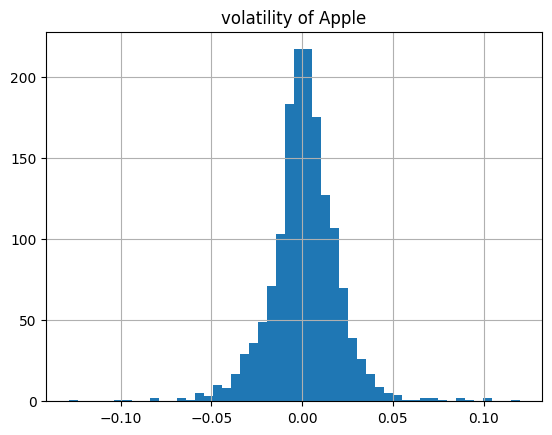

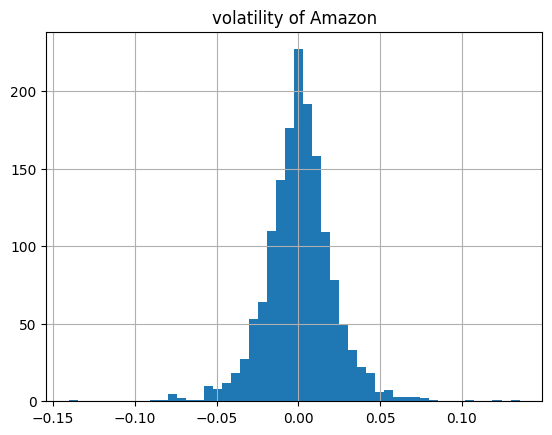

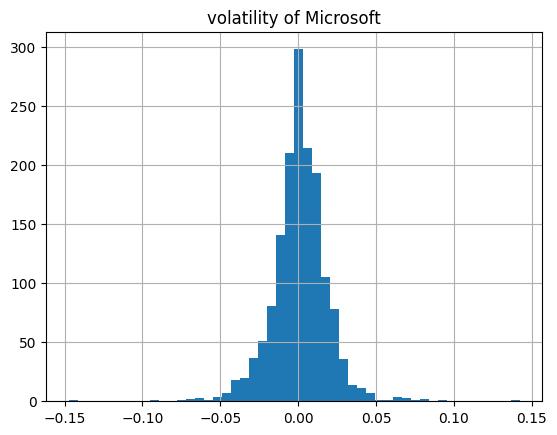

In [183]:
for i, df in zip(stocks, dfs):
    df['Close'].pct_change().hist(bins=50)
    plt.title(f"volatility of {i}")
    plt.show()

Volatility :- It is the degree of variation of stock price over time. it measures how much stock price fluctuates in a given period

#### Insights

Every stock shows a volatility of Normal distribution, That is price movements follows a pattern and it is predictable.

### Correlation Analysis

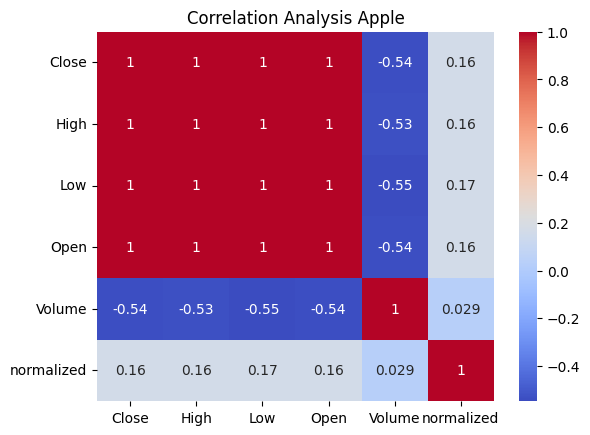

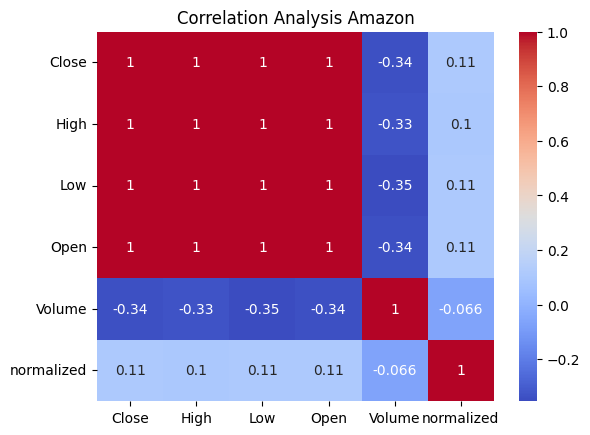

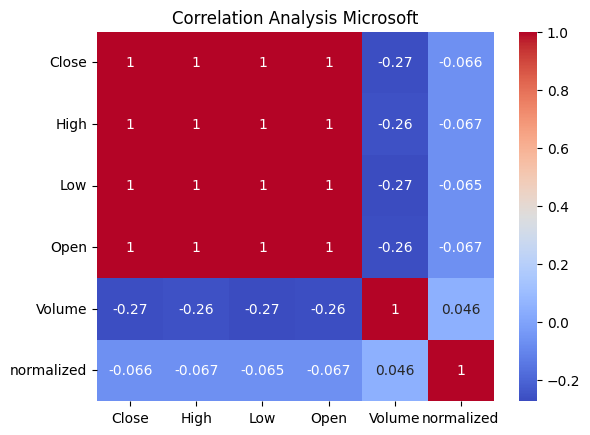

In [184]:
for i in range(len(dfs)):
    corr_matrix = dfs[i].drop('date', axis=1).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Analysis {stocks[i]}")
    plt.show()

#### Insights

Sentiment scores have some relationship with other variables 

### Sentiment scores

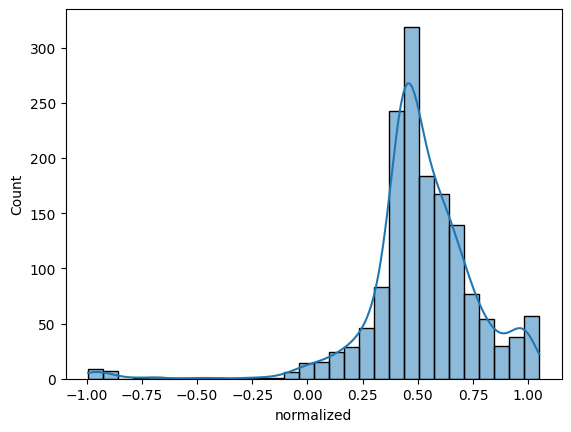

In [185]:
sns.histplot(apple_df['normalized'], kde=True, bins=30)
plt.show()

#### Insights

Most of the sentiments are positive and small count as negative